# Exercise Sheet 10 - Sentiment Analysis


## Learning Objectives
In this lab we are going to:
- Data processing and exploration
- Sentiment analysis using rule-based system
- Sentiment analysis for movie reviews using Naive Bayes



In [ ]:
#setting the stage, as usual with colab ;)
import nltk
nltk.download('treebank')
nltk.download('brown')
nltk.download('conll2000')
nltk.download('universal_tagset')
nltk.download('movie_reviews')
nltk.download('stopwords')


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Sentiment Analysis of Movie reviews

Sentiment analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

In [ ]:
# importing necessary libraries
# import nltk.classify.util
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd

The movie_review dataset was the first to be used for Sentiment Analysis, and is treated as a standard dataset to compare sentiment accuracies. This dataset is therefore included in the NLTK corpora.

In [ ]:
# We tokenizing, preprocessing and removing punctuations from the text before creating feature vector
punct_list = list(string.punctuation)
english_stopwords = stopwords.words("english")
def create_word_features(words):
    useful_words = [word for word in words if word not in english_stopwords and word not in punct_list]
    # my_dict = dict([(word.lower(), True) for word in useful_words])
    return " ".join(useful_words)

In [ ]:
# Expected input to Naive Bayes classifier
create_word_features(['the', 'quick', 'brown', 'fox'])

'quick brown fox'

In [ ]:
reviews_X = []
reviews_y = []
pos_reviews = ''
neg_reviews = ''
for fileid in movie_reviews.fileids():
    words = movie_reviews.words(fileid)
    sent = create_word_features(words)
    if fileid.split("/")[0] == "neg":
      reviews_X.append(sent)
      reviews_y.append("negative")
      neg_reviews += sent + " "
    else :
      reviews_X.append(sent)
      reviews_y.append("positive")
      pos_reviews += sent + " "


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

def plot_wordcloud(sentence, wc_name):
  # plot the WordCloud image  
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(sentence)                       
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off")
  plt.title(wc_name)
  plt.tight_layout(pad = 0)
    
  return plt.show()

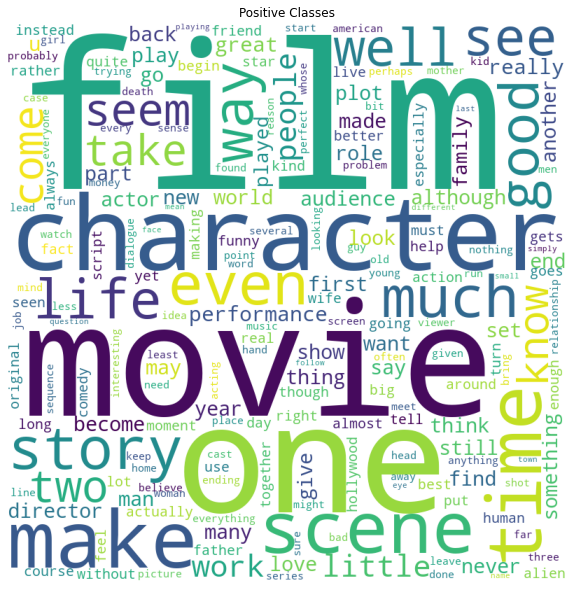

In [ ]:
# wordcloud for positive reviews
plot_wordcloud(pos_reviews, 'Positive Classes')

# Exercise 1
Plot word cloud for negative reviews

In [1]:
# YOUR CODE GOES HERE

##Sentiment analysis using rule-based system 

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

Reference: https://github.com/cjhutto/vaderSentiment#demo-including-example-of-non-english-text-translations 

In [ ]:
from sklearn.model_selection import train_test_split
# Your code goes here
train_X, test_X, train_y, test_y = train_test_split(reviews_X, reviews_y, test_size=0.1)

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()
pred_score = []
gold_labels = []

for sent, lab in zip(test_X, test_y):
  score = analyzer.polarity_scores(sent) # Calculating polarity score for each sentence
  pred_score.append(score)
  gold_labels.append(lab)

In [ ]:
pred_score[0]

{'neg': 0.138, 'neu': 0.604, 'pos': 0.258, 'compound': 0.9903}

# Exercise 2:

Write a code to intepret results from the pred_score, such that the instance is classified either as `positive` or `negative` class.

In [ ]:
# Your code goes here


# Exercise 3:

Calculate the accuracy of the rule-based classifier

In [2]:
# Your code goes here


# Sentiment Analysis with ML approaches

Naive Bias Classifier

Naive Bayes is a generative classification model.

A generative model learns parameters by maximizing the joint probability  𝑃(𝑋,𝑌)  through Bayes' rule by learning  𝑃(𝑌)  and  𝑃(𝑋|𝑌)  (where  𝑋  are features and  𝑌  are labels).

Prediction with Naive Bias

$$P\bigg(\frac{label}{features}\bigg) = \frac{P(label) \times P(\frac{features}{label})}{P(features)}$$

Assumption that all features are independant modifies the formula to:

$$P\bigg(\frac{label}{features}\bigg)= \frac{P(label) * P\big(\frac{f1}{label}\big)*...  * P\big(\frac{fn}{label}\big)}{P(features)}$$


Features can be treated in two ways, depending on the classifier being used:

2. Sklearn Classifier:
   - Word Count Vector
   - TF-IDF

### Sentiment classification
Given new unseen reviews, predict their sentiment using your naive bias model 

Two reviews are santa_review and spirit_review.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
## extracting features from text
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_X) 
X_test_counts = count_vect.transform(test_X)


# Training Multinonial NB with BagOfWords features or count vectorizer
NB_classifier_counts = MultinomialNB()
NB_classifier_counts.fit(X_train_counts.toarray(), train_y)

# evaluation 
preds = NB_classifier_counts.predict(X_test_counts.toarray())
print(classification_report(test_y, preds))



# Exercise 4
Extract TF-IDF features for the data, train a Naive Bias model and evaluate the results

In [3]:
## CODE FOR Extracting TF-IDF 


# CODE FOR Training Multinonial NB with TFIDF features or count vectorizer

# CODE FOR prediction on test_tfidf

# CODE FOR classification_report

In [ ]:
santa_review = '''
 
It would be impossible to sum up all the stuff that sucks about this film, so I'll break it down into what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra with the most unnatural laugh you're ever likely to hear; an ex-dope addict martian with tics; kid actors who make sure every syllable of their lines are slowly and caaarreee-fulll-yyy prrooo-noun-ceeed; a newspaper headline stating that Santa's been "kidnaped", and a giant robot. Yes, you read that right. A giant robot.
 
The worst acting job in here must be when Mother Claus and her elves have been "frozen" by the "Martians'" weapons. Could they be *more* trembling? I know this was the sixties and everyone was doped up, but still.
'''

spirited_review = '''
Spirited Away' is the first Miyazaki I have seen, but from this stupendous film I can tell he is a master storyteller. A hallmark of a good storyteller is making the audience empathise or pull them into the shoes of the central character. Miyazaki does this brilliantly in 'Spirited Away'. During the first fifteen minutes we have no idea what is going on. Neither does the main character Chihiro. We discover the world as Chihiro does and it's truly amazing to watch. But Miyazaki doesn't seem to treat this world as something amazing. The world is filmed just like our workaday world would. The inhabitants of the world go about their daily business as usual as full with apathy as us normal folks. Places and buildings are not greeted by towering establishing shots and majestic music. The fact that this place is amazing doesn't seem to concern Miyazaki.
 
What do however, are the characters. Miyazaki lingers upon the characters as if they were actors. He infixes his animated actors with such subtleties that I have never seen, even from animation giants Pixar. Twenty minutes into this film and I completely forgot these were animated characters; I started to care for them like they were living and breathing. Miyazaki treats the modest achievements of Chihiro with unashamed bombast. The uplifting scene where she cleanses the River God is accompanied by stirring music and is as exciting as watching gladiatorial combatants fight. Of course, by giving the audience developed characters to care about, the action and conflicts will always be more exciting, terrifying and uplifting than normal, generic action scenes. 
'''

## Predicting on random dataset


In [4]:

def predict_sentiment_count(sentence, model, count_vectoriser):
  feats = count_vectoriser.transform([sentence])
  pred = model.predict(feats.toarray())
  return pred


# Exercise 5
Complete the prediction function to predict the class of input param: `sentence`.

Using other parameters:

`model`: The TFIDF trained model

`count_vectorizer`: Fitted Bag-of-word Feature extractor

`tfidf_transformer`: Fitted tf-idf transformer

In [ ]:

def predict_sentiment_tfidf(sentence, model, count_vectoriser, tfidf_transformer):
  ## YOUR CODE FOR FEATURE EXTRACTION GOES HERE
  
  pred = ## YOUR CODE FOR USING EXTRACTED TF-IDF to make predictions with model
  return pred

In [ ]:
cnt_predict = predict_sentiment_count(santa_review, NB_classifier_counts, count_vect)
tfidf_pred = predict_sentiment_tfidf(santa_review, NB_classifier_tfidf, count_vect, tfidf_transformer)

print(f'The review for santa is :{cnt_predict} according to count')
print(f'The review for santa is :{tfidf_pred} according to tfidf')

The review for santa is :['negative'] according to count
The review for santa is :['negative'] according to tfidf


## Exercise [OPTIONAL]
Use the pretrained huggingface models to perform sentiment analysis.

Follow the instructions provided at the following link:

https://huggingface.co/docs/transformers/v4.23.1/en/task_summary#sequence-classification

# USE GPU RUNTIME FOR THIS SECTION

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline
import torch

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

sentiment_classifier = pipeline("sentiment-analysis",
                                truncation=True, 
                                max_length=512, 
                                device=device)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sentiment_classifier(["I hate you", 
                      "I want to hate you", 
                      "not too bad all things considered"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'label': 'NEGATIVE', 'score': 0.9991129040718079},
 {'label': 'NEGATIVE', 'score': 0.9994660019874573},
 {'label': 'POSITIVE', 'score': 0.9974403381347656}]

# OPTIONAL 1
Use the unprocessed `text_X` directly to perform interpretation on pretrained pipeline

In [ ]:
## YOUR CODE GOES HERE

# OPTIONAL 2
Post-process the results of pretrained model to make it compatible with the `test_y` 

i.e.

Model Predictions
```
[{'label': 'NEGATIVE', 'score': 0.9991129040718079},
 {'label': 'NEGATIVE', 'score': 0.9994660019874573},
 {'label': 'POSITIVE', 'score': 0.9974403381347656}]

```
Change to:

```
[
  "negative",
  "negative",
  "positive"
]
```

In [ ]:
def make_results_compatible_for_eval(pipeline_res):
  # YOUR CODE FOR POST-PROCESSING GOES HERE
  return 

In [ ]:
pred_y_pipeline = make_results_compatible_for_eval(pred_test)

In [ ]:
print(classification_report(test_y, pred_y_pipeline))